In [4]:
import numpy as np
import pandas as pd
import scipy as sci
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import warnings
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [3]:
inventory = pd.read_pickle('inventory.pkl')

NameError: name 'pd' is not defined

In [ ]:
inventory.head(5)

In [3]:
del(inventory['Categories'])

In [4]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0


In [5]:
inventory = inventory.rename(columns={'On-Hand': 'OnHand'})

In [6]:
import re

In [7]:
inventory['OnHand'] = pd.to_numeric(inventory.OnHand, errors='coerce').fillna(0).astype(int)

In [ ]:
inventory.dtypes

In [8]:
inventory['Qty'] = pd.to_numeric(inventory.Qty, errors='coerce').fillna(0).astype(int)

In [9]:
inventory.dtypes

STYLE#         object
COLOR          object
Description    object
LAST RCVD      object
Qty             int32
OnHand          int32
dtype: object

In [ ]:
#inventory_onhand = inventory.loc[inventory['OnHand'] != 0]

In [ ]:
#inventory_onhand.dtypes

In [ ]:
#inventory_onhand.shape

In [8]:
inventory.head(20)

,STYLE#,COLOR,Description,LAST RCVD,Qty,OnHand
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0
5,DTA1A9500,TQ,seed bead anklet,4/12/2016,144,0
6,DTA1B2029,WG-COR,row wood bead stretch br,4/4/2016,120,0
7,DTA1B2029,WG-COR,row wood bead stretch br,4/4/2016,-12,0
8,DTA1B2029,WG-COR,row wood bead stretch br,4/6/2016,-12,0
9,DTA1B2029,WG-COR,row wood bead stretch br,4/11/2016,240,0


In [10]:
inventory[inventory['OnHand']<0] = 0

In [ ]:
#inventory_onhand = inventory_onhand.loc[inventory_onhand['OnHand'] != 0]

In [11]:
inventory['Style_Color'] = inventory['STYLE#']+inventory['COLOR']

In [12]:
inventory_reconcile = inventory.groupby('Style_Color').agg({'Qty':'sum', 
                         'OnHand':'max'})

In [13]:
inventory_reconcile = inventory_reconcile.reset_index()

In [14]:
inventory_reconcile

,Style_Color,Qty,OnHand
0,0,0,0
1,DTA1A9500IV,0,0
2,DTA1A9500MUL,0,0
3,DTA1A9500TQ,0,0
4,DTA1B2029WG-COR,0,0
5,DTA1B2029WG-CRM,0,0
6,DTA1B2029WG-GRY,0,0
7,DTA1B2029WG-IV,0,0
8,DTA1B2029WG-JET,0,0
9,DTA1B2029WG-LBR,0,0


In [15]:
inventory_reconcile.loc[inventory_reconcile['Qty'] == inventory_reconcile['OnHand'], 'C'] = inventory_reconcile['OnHand']
inventory_reconcile.loc[inventory_reconcile['Qty'] != inventory_reconcile['OnHand'], 'C'] = abs(inventory_reconcile['Qty'])

In [16]:
inventory_reconcile

,Style_Color,Qty,OnHand,C
0,0,0,0,0.0
1,DTA1A9500IV,0,0,0.0
2,DTA1A9500MUL,0,0,0.0
3,DTA1A9500TQ,0,0,0.0
4,DTA1B2029WG-COR,0,0,0.0
5,DTA1B2029WG-CRM,0,0,0.0
6,DTA1B2029WG-GRY,0,0,0.0
7,DTA1B2029WG-IV,0,0,0.0
8,DTA1B2029WG-JET,0,0,0.0
9,DTA1B2029WG-LBR,0,0,0.0


In [17]:
try1 = pd.DataFrame(inventory.groupby('Style_Color')['Qty'].agg('sum')).reset_index()
try1.head(50)

,Style_Color,Qty
0,0,0
1,DTA1A9500IV,0
2,DTA1A9500MUL,0
3,DTA1A9500TQ,0
4,DTA1B2029WG-COR,0
5,DTA1B2029WG-CRM,0
6,DTA1B2029WG-GRY,0
7,DTA1B2029WG-IV,0
8,DTA1B2029WG-JET,0
9,DTA1B2029WG-LBR,0


In [18]:
try2 = pd.DataFrame(inventory.groupby('Style_Color').OnHand.max()).reset_index()
try2.head(10)

,Style_Color,OnHand
0,0,0
1,DTA1A9500IV,0
2,DTA1A9500MUL,0
3,DTA1A9500TQ,0
4,DTA1B2029WG-COR,0
5,DTA1B2029WG-CRM,0
6,DTA1B2029WG-GRY,0
7,DTA1B2029WG-IV,0
8,DTA1B2029WG-JET,0
9,DTA1B2029WG-LBR,0


In [19]:
try3 = pd.merge(try1,try2, on = "Style_Color")
try3

,Style_Color,Qty,OnHand
0,0,0,0
1,DTA1A9500IV,0,0
2,DTA1A9500MUL,0,0
3,DTA1A9500TQ,0,0
4,DTA1B2029WG-COR,0,0
5,DTA1B2029WG-CRM,0,0
6,DTA1B2029WG-GRY,0,0
7,DTA1B2029WG-IV,0,0
8,DTA1B2029WG-JET,0,0
9,DTA1B2029WG-LBR,0,0


In [ ]:
#try3['Qty'] = try3['Qty']*-1

In [ ]:
try3['OnHand'] = try3['OnHand']*-1

In [ ]:
try3['left_over'] = try3['Qty'] + try3['OnHand']

In [ ]:
try3['left_over'] = abs(try3['left_over'])

In [ ]:
try3

In [ ]:
len(try3.loc[try3['left_over'] != 0])

In [ ]:
len(try3.index)

In [ ]:
len(new_sale.index)

In [ ]:
try4 = pd.merge(try3, new_sale, on = 'Style_Color', how = 'left')

In [ ]:
len(try4.index)

In [ ]:
try4.head(50)

In [ ]:
try4.loc[try4['Style_Color'] == "DTYLN-610083GD"]

In [ ]:
len(try4.index)

In [ ]:
try4.sample(15)

In [ ]:
try5 = try4.groupby('Style_Color').agg({'QTY':'sum', 
                         'LAST RCVD':'max', 
                         'LAST INVOICED':'max',
                        'left_over':'max'})

In [ ]:
from datetime import datetime
date_format = "%m/%d/%Y"
try5['a'] = datetime.strptime(try5['LAST INVOICED'], date_format)
try5['b'] = datetime.strptime(try5['LAST RCVD'], date_format)
try5['days_diff'] = (b - a).days

In [ ]:
try5['length'] = try5['LAST INVOICED'] - try5['LAST RCVD']

In [ ]:
try4 = try4.drop(['EXT-AMT','REASON','State_sold','ZIP_sold','Seasos','Season target','Revenue','Quarter'],axis = 1)

In [ ]:
try4 = try4.drop(['Qty','OnHand','STYLE#'], axis = 1)

In [ ]:
try4 = try4.drop(['CUST #','year','month'], axis = 1)

In [ ]:
try4['inventory_value'] = try4['left_over']*(try4['UNIT PRICE']/0.5)

In [ ]:
len(try4.index)

In [ ]:
try5 = try4.drop(['INVC DATE','UNIT PRICE','UNIT PRICE'], axis = 1)

In [ ]:
total_leftover = try5.loc[try5['inventory_value'] != 0]

In [ ]:
pd.DataFrame(total_leftover.groupby(['Style_Color'])['inventory_value'].sum())

In [ ]:
try4['inventory_worth'] = 

In [ ]:
pd.DataFrame(inventory_onhand.groupby(['year'])['cost_per_unit'].mean())

In [5]:
sale = pd.read_pickle('sales_latest_update.pkl')

In [6]:
Return_orders = sale[~sale['REASON'].isnull()]

In [7]:
return_order_code = list(Return_orders['Style_Color'])

In [8]:
new_sale = sale.loc[~sale['Style_Color'].isin(return_order_code)]

In [24]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,117.0
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,39.0


In [25]:
ex1 = pd.DataFrame(new_sale.groupby(['CUST #','Style_Color','State_sold'])['QTY'].sum()).reset_index()

In [ ]:
ex1.head(50)

In [26]:
ex1.loc[ex1['Style_Color'] == "DTA1E2126GD"]

,CUST #,Style_Color,State_sold,QTY
6543,BEL007,DTA1E2126GD,UK,36
9243,BLU004,DTA1E2126GD,NJ,36
10168,CAR008,DTA1E2126GD,GA,36
11732,CLO001,DTA1E2126GD,MA,12
12225,DAZ002,DTA1E2126GD,TN,12
16181,FAL001,DTA1E2126GD,MT,12
17684,GAR001,DTA1E2126GD,ON,48
18147,GEN001,DTA1E2126GD,TX,12
18208,GMA01,DTA1E2126GD,0,24
18401,GOL001,DTA1E2126GD,GA,60


In [27]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [28]:
new_sale['Quarter'] = new_sale['month']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
new_sale.loc[new_sale['Quarter'].isin(Q1),'Quarter']='Q1'
new_sale.loc[new_sale['Quarter'].isin(Q2),'Quarter']='Q2'
new_sale.loc[new_sale['Quarter'].isin(Q3),'Quarter']='Q3'
new_sale.loc[new_sale['Quarter'].isin(Q4),'Quarter']='Q4'

C:\Users\Bird_\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
new_sale['Style_Color'] = new_sale['STYLE#']+new_sale['COLOR']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
inventory_reconcile

,Style_Color,Qty,OnHand,C
0,0,0,0,0.0
1,DTA1A9500IV,0,0,0.0
2,DTA1A9500MUL,0,0,0.0
3,DTA1A9500TQ,0,0,0.0
4,DTA1B2029WG-COR,0,0,0.0
5,DTA1B2029WG-CRM,0,0,0.0
6,DTA1B2029WG-GRY,0,0,0.0
7,DTA1B2029WG-IV,0,0,0.0
8,DTA1B2029WG-JET,0,0,0.0
9,DTA1B2029WG-LBR,0,0,0.0


In [ ]:
inventory_onhand.head(10)

In [34]:
import numpy as np

In [36]:
new_sale['LAST RCVD'] = pd.to_datetime(new_sale['LAST RCVD'])
new_sale['LAST INVOICED'] = pd.to_datetime(new_sale['LAST INVOICED'])

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
new_sale['LAST RCVD'] = np.where(new_sale['LAST RCVD'] == "NO DATA", new_sale['INVC DATE'], new_sale['LAST RCVD'])

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
new_sale.loc[new_sale['FIRST RCVD'] == 'NO DATA']

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,Quarter
663,DTA1E112,G-CANCOR,natural stone drop earring,BAM001,2016-08-19,12,5.50,$ 66.00,NaN,HAND MADE,HD,HI,96814,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-08-19,NO DATA,2018-10-03,8/19/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,8,DTA1E112G-CANCOR,66.00,Q3
664,DTA1E112,G-GRYSOD,natural stone drop earring,JEN005,2016-09-26,12,5.50,$ 66.00,NaN,HAND MADE,HD,0,0,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-09-26,NO DATA,2018-10-03,9/13/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,9,DTA1E112G-GRYSOD,66.00,Q3
665,DTA1E112,G-GRYSOD,natural stone drop earring,NOR001,2016-09-13,12,5.50,$ 66.00,NaN,HAND MADE,HD,CA,92627,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-09-13,NO DATA,2018-10-03,9/13/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,9,DTA1E112G-GRYSOD,66.00,Q3
666,DTA1E112,G-GRYSOD,natural stone drop earring,TRE011,2016-09-26,12,5.50,$ 66.00,NaN,HAND MADE,HD,PR,926,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-09-26,NO DATA,2018-10-03,9/13/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,9,DTA1E112G-GRYSOD,66.00,Q3
667,DTA1E112,G-LABBGD,natural stone drop earring,DAI001,2016-08-31,12,5.50,$ 66.00,NaN,HAND MADE,HD,CA,92653,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-08-31,NO DATA,2018-10-03,8/31/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,8,DTA1E112G-LABBGD,66.00,Q3
668,DTA1E112,G-LABSOD,natural stone drop earring,DAI001,2016-08-31,12,5.50,$ 66.00,NaN,HAND MADE,HD,CA,92653,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-08-31,NO DATA,2018-10-03,8/31/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,8,DTA1E112G-LABSOD,66.00,Q3
669,DTA1E112,G-LAVGRY,natural stone drop earring,BAM001,2016-08-19,12,5.50,$ 66.00,NaN,HAND MADE,HD,HI,96814,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-08-19,NO DATA,2018-10-03,8/19/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,8,DTA1E112G-LAVGRY,66.00,Q3
670,DTA1E112,G-OBLHOW,natural stone drop earring,BAM001,2016-08-19,12,5.50,$ 66.00,NaN,HAND MADE,HD,HI,96814,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-08-19,NO DATA,2018-10-03,8/19/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,8,DTA1E112G-OBLHOW,66.00,Q3
671,DTA1E112,G-OPLBLA,natural stone drop earring,GOL001,2016-03-11,36,5.50,$ 198.00,NaN,HAND MADE,HD,GA,30303,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-03-11,NO DATA,2018-10-03,3/11/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,3,DTA1E112G-OPLBLA,198.00,Q1
672,DTA1E112,G-OPLCHA,natural stone drop earring,GOL001,2016-03-11,36,5.50,$ 198.00,NaN,HAND MADE,HD,GA,30303,BEFORE 2016,BEFORE 2016 1ST,OLD,2016-03-11,NO DATA,2018-10-03,3/11/16,"[natural, stone, drop, earring]",EarRings,natural stone drop earring,Nature_Stone,2016,3,DTA1E112G-OPLCHA,198.00,Q1


In [38]:
new_sale['FIRST RCVD'] = np.where(new_sale['FIRST RCVD'] == "NO DATA", new_sale['FIRST INVOICED'], new_sale['FIRST RCVD'])

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
new_sale['FIRST RCVD'] = pd.to_datetime(new_sale['FIRST RCVD'])
new_sale['FIRST INVOICED'] = pd.to_datetime(new_sale['FIRST INVOICED'])

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
new_sale = new_sale.drop(['Categories', 'Attribute'], axis = 1)

In [ ]:
new_sale.head(20)

In [72]:
print(new_sale['INVC DATE'].max())
print(new_sale['INVC DATE'].min())

2018-10-03 00:00:00
2016-01-04 00:00:00


In [141]:
new_sale.to_pickle('sale_no_re.pkl')

In [41]:
new_sale['Style_Color'].value_counts().sort_values(ascending = False)

DTA4E2531JET             170
DTA4E2531IV              162
DTA4E2531GRY             121
DTAN1190PJA              103
DTA4E2531BLS              98
DTAN1107IV-BRN            96
DTAN1190JET               92
DTA6N8502JET              86
DTA7E2044JET              82
DTA6N2068MST              78
DTAN1190CHA               78
DTA6N8502GRY              76
DTA6E2068FU               74
DTA6E2068RED              72
DTA6E2068NV               71
DTA6E4227WG               71
DTA4E2531BL               68
DTA7E2044MST              67
DTA6E2068TL               67
DTA4E2531BRN              67
DTA6E2068BRN              66
DTA7E2044DPK              64
DTA2N2111WG-JET           64
DTA5E2774IV               62
DTA6N4227RH               61
DTAN200HEM                61
DTA2B2029GD-TGE           61
DTAE2118RSG-RSG           61
DTA5N6207HOW              61
DTA6N5993RQ               59
DTALN-610083RG            59
DTA6N4227RG               59
DTA4E2562GRY              58
DTA2N2093GRY              56
DTA6N5993HOW  

In [88]:
modeling_data1

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories1,material_style,year,month,Style_Color,Revenue,Quarter
23884,DTA4E2531,GRY,wire tassel hook er,AAG001,2018-08-10,12,3.75,$ 45.00,NaN,IMPORT,NOBLES,MS,39047,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2018,8,DTA4E2531GRY,45.00,Q3
23885,DTA4E2531,GRY,wire tassel hook er,ACC012,2018-05-25,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2018,5,DTA4E2531GRY,42.00,Q2
23886,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-07-27,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2017,7,DTA4E2531GRY,42.00,Q3
23887,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-12-15,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2017,12,DTA4E2531GRY,42.00,Q4
23888,DTA4E2531,GRY,wire tassel hook er,ACC019,2018-01-30,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2018,1,DTA4E2531GRY,42.00,Q1
23889,DTA4E2531,GRY,wire tassel hook er,ACE002,2018-10-03,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,IL,60640,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2018,10,DTA4E2531GRY,42.00,Q4
23890,DTA4E2531,GRY,wire tassel hook er,ALE003,2017-12-28,72,3.50,$ 252.00,NaN,IMPORT,NOBLES,MS,39157,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2017,12,DTA4E2531GRY,252.00,Q4
23891,DTA4E2531,GRY,wire tassel hook er,ALT001,2017-09-22,732,3.65,"$ 2,671.80",NaN,IMPORT,NOBLES,TN,37801,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2017,9,DTA4E2531GRY,2671.80,Q3
23892,DTA4E2531,GRY,wire tassel hook er,AND003,2018-01-10,24,3.50,$ 84.00,NaN,IMPORT,NOBLES,CA,90021,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2018,1,DTA4E2531GRY,84.00,Q1
23893,DTA4E2531,GRY,wire tassel hook er,AND003,2018-07-06,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,CA,90021,2018,2018 2ND,FW18,2018-10-02,2017-07-10,2018-10-03,2017-07-10,EarRings,wired,2018,7,DTA4E2531GRY,42.00,Q3


In [232]:
new_sale.shape

(76630, 27)

In [123]:
sample = new_sale.loc[new_sale['Style_Color'].isin(['DTA4E2531JET','DTA4E2531IV','DTA4E2531GRY', 'DTAN1190PJA'])]

In [124]:
sample_period = pd.DataFrame(sample.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [125]:
sample_period

,INVC DATE,Style_Color,QTY
0,2016-01-05,DTAN1190PJA,36
1,2016-01-26,DTAN1190PJA,36
2,2016-02-03,DTAN1190PJA,12
3,2016-03-07,DTAN1190PJA,60
4,2016-03-23,DTAN1190PJA,12
5,2016-03-25,DTAN1190PJA,24
6,2016-03-29,DTAN1190PJA,60
7,2016-03-30,DTAN1190PJA,96
8,2016-04-06,DTAN1190PJA,72
9,2016-04-29,DTAN1190PJA,48


In [126]:
sample_period = sample_period.rename(columns={'INVC DATE': 'INVCDATE'})

In [127]:
sample_period['QTY'] = sample_period['QTY'].apply(lambda x: int(x))

In [128]:
sample_period = sample_period.set_index('INVCDATE')

In [129]:
sample_period

,Style_Color,QTY
INVCDATE,,
2016-01-05,DTAN1190PJA,36
2016-01-26,DTAN1190PJA,36
2016-02-03,DTAN1190PJA,12
2016-03-07,DTAN1190PJA,60
2016-03-23,DTAN1190PJA,12
2016-03-25,DTAN1190PJA,24
2016-03-29,DTAN1190PJA,60
2016-03-30,DTAN1190PJA,96
2016-04-06,DTAN1190PJA,72


In [130]:
sample_period2 = sample_period[['Style_Color','QTY']].pivot(columns = 'Style_Color', values = 'QTY')

In [131]:
sample_period2

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-05,NaN,NaN,NaN,36.0
2016-01-26,NaN,NaN,NaN,36.0
2016-02-03,NaN,NaN,NaN,12.0
2016-03-07,NaN,NaN,NaN,60.0
2016-03-23,NaN,NaN,NaN,12.0
2016-03-25,NaN,NaN,NaN,24.0
2016-03-29,NaN,NaN,NaN,60.0
2016-03-30,NaN,NaN,NaN,96.0
2016-04-06,NaN,NaN,NaN,72.0


In [132]:
sample_period2 = sample_period2.fillna(1)

In [133]:
sample_period2

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-05,1.0,1.0,1.0,36.0
2016-01-26,1.0,1.0,1.0,36.0
2016-02-03,1.0,1.0,1.0,12.0
2016-03-07,1.0,1.0,1.0,60.0
2016-03-23,1.0,1.0,1.0,12.0
2016-03-25,1.0,1.0,1.0,24.0
2016-03-29,1.0,1.0,1.0,60.0
2016-03-30,1.0,1.0,1.0,96.0
2016-04-06,1.0,1.0,1.0,72.0


In [134]:
train_data = sample_period.copy()

In [135]:
useGrouper = True
if useGrouper:
        grouper = pd.Grouper(freq='W-FRI')
        train_data2 = train_data.groupby(grouper).sum()
        train_data2.head()
else:
        train_data['week'] = train_data1.index.year * 52 + np.clip(train_data.index.week, 0, 52.5)
        if 'Date' not in train_data.columns: train_data.reset_index(inplace=True)
        train_data2 = train_data.groupby('week').sum()
        train_data1['week'] = train_data.groupby('week').last()['Date']
        train_data2 = train_data2.set_index('week')
        print(train_data2.head())

In [136]:
train_window = train_data2.shape[0] - 12  # Use the full data set except the last 10 weeks
train_data2.index.rename('Week',inplace=True)
train_data3 = train_data2.iloc[:train_window]

In [139]:
code_x = ['DTA4E2531JET','DTA4E2531IV','DTA4E2531GRY','DTAN1190PJA']

In [140]:
model = VAR(train_data3[code_x], dates=train_data3.index)

KeyError: "['DTA4E2531JET' 'DTA4E2531IV' 'DTA4E2531GRY' 'DTAN1190PJA'] not in index"

In [89]:
import warnings
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            ans = model.fit(2, ic = 'aic') 

In [92]:
ans.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 07, Dec, 2018
Time:                     23:37:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    26.4997
Nobs:                     132.000    HQIC:                   26.4608
Log likelihood:          -2303.56    FPE:                3.02148e+11
AIC:                      26.4342    Det(Omega_mle):     2.95384e+11
--------------------------------------------------------------------
Results for equation DTA4E2531JET
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        48.416667         7.488244            6.466           0.000

Results for equation DTA4E2531IV
           coefficient       std. error           t-stat            prob
---------------------------------------------------

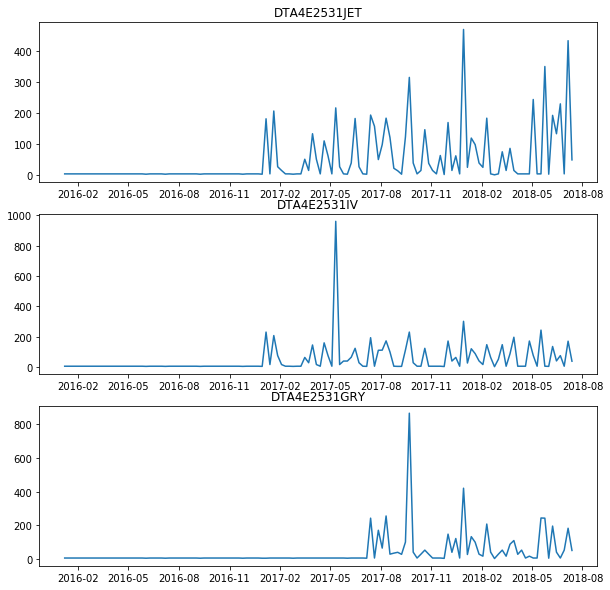

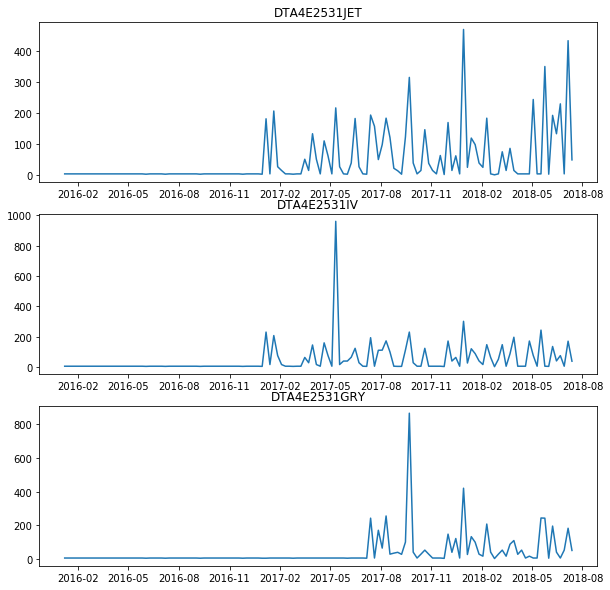

In [93]:
ans.plot()

In [104]:
useExog = True
endo_tickers = ['DTA4E2531JET']
exog_tickers = ['DTA4E2531IV','DTA4E2531GRY']
endo = train_data3[endo_tickers]
exog = train_data3[exog_tickers] if useExog else None
varmax  = VARMAX(endo, exog = exog, order=(1,0), start_params=None)

In [105]:
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            result = varmax.fit(maxiter=1000)

ValueError: Only gave one variable to VAR

In [29]:
sold_period = pd.DataFrame(new_sale.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [30]:
sold_period.shape

(62077, 3)

In [31]:
sold_period = sold_period.rename(columns={'INVC DATE': 'INVCDATE'})

In [298]:
#style_Color_code = list(sold_period['Style_Color'].unique())

In [32]:
sold_period.shape

(62077, 3)

In [33]:
sold_period['QTY'] = sold_period['QTY'].apply(lambda x: int(abs(x)))

In [34]:
sold_period = sold_period.set_index('INVCDATE')

In [16]:
from scipy import stats
import numpy as np

In [309]:
pd.options.display.max_columns = 500

In [35]:
sold_period2 = sold_period[['Style_Color','QTY']].pivot(columns = 'Style_Color', values = 'QTY')

In [37]:
sold_period2 = sold_period2.fillna(1)

In [39]:
useGrouper = True
if useGrouper:
        grouper    = pd.Grouper(freq='W-FRI')
        train_data2 = train_data.groupby(grouper).sum()
        train_data2.head()
else:
        train_data['week'] = train_data.index.year * 52 + np.clip(train_data.index.week, 0, 52.5)
        if 'Date' not in train_data.columns: train_data.reset_index(inplace=True)
        train_data2 = train_data.groupby('week').sum()
        train_data['week'] = train_data.groupby('week').last()['Date']
        train_data2 = train_data2.set_index('week')
        print(ret_train2.head())

In [66]:
train_window = train_data2.shape[0] - 12  # Use the full data set except the last 10 weeks
train_data2.index.rename('Week',inplace=True)
train_data3 = train_data2.iloc[:train_window]

In [68]:
train_data2.shape

(92, 1)

In [69]:
train_data3.shape

(80, 1)

In [70]:
code_x = ['DTA4E2531JET','DTA4E2531IV','DTA4E2531GRY']

In [71]:
model = VAR(train_data3[code_x], dates=train_data3.index)

KeyError: "['DTA4E2531JET' 'DTA4E2531IV' 'DTA4E2531GRY'] not in index"

In [77]:
print(new_sale['INVC DATE'].max())
print(new_sale['INVC DATE'].min())

2018-10-03 00:00:00
2016-01-04 00:00:00


In [ ]:
where COALESCE(column_name,0) = 0

In [40]:
train_window = train_data2.shape[0] - 12  # Use the full data set except the last 10 weeks
train_data2.index.rename('Week',inplace=True)
train_data3 = train_data2.iloc[:train_window]

In [41]:
train_data2.shape

(144, 14990)

In [42]:
train_data3.shape

(132, 14990)

In [43]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

In [44]:
style_color_code = list(sold_period['Style_Color'].unique())

In [45]:
model = VAR(train_data3[style_color_code], dates=train_data3.index)

In [47]:
import warnings
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            ans = model.fit(2, ic = 'aic')

LinAlgError: 28-th leading minor of the array is not positive definite

In [208]:
sold_period = np.log(sold_period)


In [210]:
sold_period = sold_period.fillna(0)

In [179]:
from scipy import stats
import numpy as np

In [206]:
sold_period = abs(sold_period)# log returns

In [213]:
train_data = sold_period.copy()
train_data.head(5)

QTY                                                    \
Style_Color DTA07061310BLRG DTA07061326NKRG DTA07061447NKRG DTA1610@1797@1BWG   
INVCDATE                                                                        
2016-01                 0.0             0.0             0.0               0.0   
2016-02                 0.0             0.0             0.0               0.0   
2016-03                 0.0             0.0             0.0               0.0   
2016-04                 0.0             0.0             0.0               0.0   
2016-05                 0.0             0.0             0.0               0.0   

                                                               \
Style_Color DTA165@433@7AGD DTA165@433@7AGOLD DTA165@433@7ARG   
INVCDATE                                                        
2016-01                 0.0               0.0             0.0   
2016-02                 0.0               0.0             0.0   
2016-03                 0.0               0.0             0.0   
2016-04                 0.0               0.0             0.0   
2016-05                 0.0               0.0             0.0   

                                                                     \
Style_Color DTA169@1520ROSEGOLD DTA1710@1743@1ARG DTA1710@1743@1ASV   
INVCDATE                                                              
2016-01                     0.0               0.0               0.0   
2016-02                     0.0               0.0               0.0   
2016-03                     0.0               0.0               0.0   
2016-04                     0.0               0.0               0.0   
2016-05                     0.0               0.0               0.0   

                                                                   \
Style_Color DTA1711-816-IBRG DTA174@557RHODIUM DTA174@557ROSEGOLD   
INVCDATE                                                            
2016-01                  0.0               0.0                0.0   
2016-02                  0.0               0.0                0.0   
2016-03                  0.0               0.0                0.0   
2016-04                  0.0               0.0                0.0   
2016-05                  0.0               0.0                0.0   

                                                                         \
Style_Color DTA174@606@1BRH DTA174@777@3BRG DTA176-319GOLD DTA176-319RG   
INVCDATE                                                                  
2016-01                 0.0             0.0            0.0          0.0   
2016-02                 0.0             0.0            0.0          0.0   
2016-03                 0.0             0.0            0.0          0.0   
2016-04                 0.0             0.0            0.0          0.0   
2016-05                 0.0             0.0            0.0          0.0   

                                                                             \
Style_Color DTA176-319RH DTA176-326GOLD DTA176-326ROSEGOLD DTA176@1105@2BRG   
INVCDATE                                                                      
2016-01              0.0            0.0                0.0              0.0   
2016-02              0.0            0.0                0.0              0.0   
2016-03              0.0            0.0                0.0              0.0   
2016-04              0.0            0.0                0.0              0.0   
2016-05              0.0            0.0                0.0              0.0   

                                                               \
Style_Color DTA177@1182@2BRG DTA177@1182@2BRH DTA177@1321GOLD   
INVCDATE                                                        
2016-01                  0.0              0.0             0.0   
2016-02                  0.0              0.0             0.0   
2016-03                  0.0              0.0             0.0   
2016-04                  0.0              0.0             0.0   
2016-05                  0.0              0